# Preparação dos dados

Este notebook destina-se a preparação inicial dos dados que serão utilizados pelos modelos de redes neurais artificias.

Local: BR  
Período dos Dados: 2019

Fonte do dados: [NSRDB](https://nsrdb.nrel.gov/)

## Importação de bibliotecas 

In [1]:
# Manipulação dos dados (importação, exploração e transformação)
import pandas as pd

# Visualização dos dados

import seaborn as sns
import matplotlib.pyplot as plt

## Nomenclatura adotada
+ **Atributos previsores** -> Variáveis preditores e/ou independente;
+ **Atributo Alvo** -> Variável dependente que pretende-se prever.

In [2]:
url = 'https://github.com/fellypesb/projeto_PET_2021/raw/main/Dados/local_BR/local_BR_NSRDB_2019.csv'

local_BR = pd.read_csv(url, header=2, sep=',')

In [3]:
local_BR.head()

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Global Horizontal UV Irradiance (280-400nm),Global Horizontal UV Irradiance (295-385nm),Unnamed: 18
0,2019,1,1,0,30,0,0,23.6,152.01,0.17,1.6,5.5,83,86.45,26.0,1005,0.0,0.0,NaN
1,2019,1,1,1,30,0,0,23.6,143.44,0.17,1.6,5.5,86,87.56,25.8,1005,0.0,0.0,NaN
2,2019,1,1,2,30,0,0,23.7,131.88,0.17,1.7,5.4,89,89.50,25.6,1005,0.0,0.0,NaN
3,2019,1,1,3,30,0,0,24.1,119.04,0.17,1.7,5.4,94,91.71,25.5,1005,0.0,0.0,NaN
4,2019,1,1,4,30,0,0,24.3,105.60,0.17,1.7,5.4,99,94.99,25.2,1006,0.0,0.0,NaN


In [4]:
# Preparação dos dados

def adjustData(data):
    '''
        Esta função realiza as seguintes transformações no conjunto de dados:
        - Exclui colunas desnecessárias para análises
        - Renomeia os labels das colunas deixando-as minúsculas e sem espaço entre as palavras
        - Filtra as amostras por horário das 5h30m às 17h30m
    '''
    df_ = data.loc[:,'Year':'Pressure'] 
    df_.columns = df_.columns.str.lower().str.replace(' ', '_') 
    df_ = df_.query('hour >= 5 and hour <= 17').reset_index().drop('index', axis=1)
    return df_

In [5]:
local_BR_adjust = adjustData(local_BR)
local_BR_adjust.head()

,year,month,day,hour,minute,ghi,clearsky_ghi,dew_point,solar_zenith_angle,surface_albedo,wind_speed,precipitable_water,wind_direction,relative_humidity,temperature,pressure
0,2019,1,1,5,30,0,0,24.5,91.90,0.17,1.5,5.4,103,95.82,25.2,1007
1,2019,1,1,6,30,74,155,24.7,78.03,0.17,1.4,5.4,103,95.42,25.5,1008
2,2019,1,1,7,30,297,394,24.8,64.33,0.17,1.5,5.4,93,91.81,26.2,1008
3,2019,1,1,8,30,554,623,24.5,50.88,0.17,1.5,5.4,79,85.57,27.1,1008
4,2019,1,1,9,30,656,810,24.2,38.09,0.17,1.5,5.4,67,80.08,28.0,1008


# Correlações
A seguir, buscou-se as 4 melhores correlações com a variável de irradiância solar. Isso porque, é necessário a escolha de atributos previsores que auxiliem o modelo em suas previsões do alvo. 

In [6]:
best_corr = local_BR_adjust.loc[:,'ghi':'pressure'].corr()['ghi'].abs().sort_values(ascending=False)[1:5]
best_corr

solar_zenith_angle    0.884535
clearsky_ghi          0.883905
relative_humidity     0.467314
temperature           0.457636
Name: ghi, dtype: float64

Atributos | Correlações absolutas
-------------------- | --------
Ângulo Zenital | 0.884535
Irradiância Céu Claro | 0.883905
Umidade Relativa | 0.467314
Temperatura | 0.457636

In [7]:
local_BR_adjust.loc[:,'ghi':'pressure'].corr()

,ghi,clearsky_ghi,dew_point,solar_zenith_angle,surface_albedo,wind_speed,precipitable_water,wind_direction,relative_humidity,temperature,pressure
ghi,1.000000,0.883905,-0.353091,-0.884535,0.043292,0.011189,-0.180490,-0.127536,-0.467314,0.457636,-0.012278
clearsky_ghi,0.883905,1.000000,-0.246614,-0.991476,-0.000769,-0.024997,0.022037,-0.164564,-0.340989,0.324547,0.090529
dew_point,-0.353091,-0.246614,1.000000,0.267427,-0.461901,0.024186,0.521927,-0.055656,0.930423,-0.870079,0.532146
solar_zenith_angle,-0.884535,-0.991476,0.267427,1.000000,-0.016603,0.028715,0.000037,0.150205,0.367151,-0.353828,-0.076663
surface_albedo,0.043292,-0.000769,-0.461901,-0.016603,1.000000,0.049399,-0.191852,0.112417,-0.496019,0.474070,-0.428223
wind_speed,0.011189,-0.024997,0.024186,0.028715,0.049399,1.000000,-0.238312,-0.181334,0.039360,-0.053729,0.271534
precipitable_water,-0.180490,0.022037,0.521927,0.000037,-0.191852,-0.238312,1.000000,-0.086429,0.540125,-0.525554,0.063628
wind_direction,-0.127536,-0.164564,-0.055656,0.150205,0.112417,-0.181334,-0.086429,1.000000,-0.085943,0.077969,-0.072165
relative_humidity,-0.467314,-0.340989,0.930423,0.367151,-0.496019,0.039360,0.540125,-0.085943,1.000000,-0.979651,0.586752
temperature,0.457636,0.324547,-0.870079,-0.353828,0.474070,-0.053729,-0.525554,0.077969,-0.979651,1.000000,-0.610955


### Leaky feature?

Observou-se que a variável irradiância de céu claro possui as mesmas variações da irradiância normal durante o dia, porém com valores um pouco mais elevado. Isto é coerente, pois ambas se diferem no pressuposto de haver ou não nuvens no momento de coleta da taxa de irradiância. Tendo observado essas características, surgiu o seguinte questionamento: A variável irradiância de céu claro prova vazamento de informações sobre a taxa de irradiância que objetiva-se prever?

In [8]:
local_BR_adjust[['clearsky_ghi', 'ghi']][:13] 

,clearsky_ghi,ghi
0,0,0
1,155,74
2,394,297
3,623,554
4,810,656
5,936,859
6,990,930
7,969,969
8,869,869
9,702,702


In [9]:
local_BR_adjust[['solar_zenith_angle', 'ghi']][:13]

,solar_zenith_angle,ghi
0,91.90,0
1,78.03,74
2,64.33,297
3,50.88,554
4,38.09,656
5,27.03,859
6,20.76,930
7,23.54,969
8,33.15,869
9,45.42,702


### todo
+ verificar causalidade da melhor correlação encontrada

# Valores inconsistentes

A seguir verificou-se a presença de valores inconsistentes (_NaN_ ou _NULL_) no conjunto de dados utilizado. Neste caso, não foram encontrados nenhum desses valores, caso contrário seria necessário o tratamento dos mesmos.

In [10]:
# Devolve um único booleano para informar se há alguma amostra/registrro com valor incosistente no Dataset
result = local_BR_adjust.isnull().any().any() 
print(f'Existe algum valor inconsistente no conjunto de dados? {result}')

Existe algum valor inconsistente no conjunto de dados? False


# Divisão dos dados
A seguir, realizou-se a subdivisão dos dados em 3 (três) conjuntos:
+ Dados de **Treino**;
+ Dados de **Validação**;
+ Dados de **Teste**.

Os dados de treino e validação serão utilizados durante a etapa de prototipagem dos modelos. Somente após encontrar as **melhores configurações** para o modelo (atributos previsores, hiperparâmetros, etc..), que o mesmo, será submetido ao conjunto de teste, para que, seja possível avaliar com maior precisão a capacidade de **generalização** do modelo final.

Optou-se por dividir os dados de forma que, 90% dos registros totais fossem destinados ao conjunto de treinamento, 10% do resgistros totais, destinados ao conjunto de teste e 10% do conjunto de treinamento, destinado ao conjunto de validação.

Durante a divisão dos dados, também foram descartados todos os atributos que não serão utilizados, são eles: atributos com correlação (com irradiância solar) **menor** que a temperatura e atributos que possuem **valores únicos** em todos os registros (ano e minutos). O novo conjunto formado reduziu o número de atributos de 16 para 8, incluíndo atributos previsores e atributo alvo.

In [11]:
mask = best_corr.index.to_list()
[mask.insert(i, j) for i,j in zip(range(0,4),['month', 'day', 'hour','ghi'])]
mask

['month',
 'day',
 'hour',
 'ghi',
 'solar_zenith_angle',
 'clearsky_ghi',
 'relative_humidity',
 'temperature']

In [12]:
local_BR_adjust[mask].head()

,month,day,hour,ghi,solar_zenith_angle,clearsky_ghi,relative_humidity,temperature
0,1,1,5,0,91.90,0,95.82,25.2
1,1,1,6,74,78.03,155,95.42,25.5
2,1,1,7,297,64.33,394,91.81,26.2
3,1,1,8,554,50.88,623,85.57,27.1
4,1,1,9,656,38.09,810,80.08,28.0


In [13]:
def split_data(full_data, train_size):
    '''
        Função que realiza a subdivisão de um conjunto total de dados em 3 (três) grupos, treino, validação e teste.
        Esta divisão é realizada de acordo o tamanho especificado.
        
        Parâmetros:
        
        full_data: pd.DataFrame
            Conjunto total de dados que será dividido.
        
        train_size: float
            Tamanho desejado para o conjunto de treinamento. É necessário que este valor esteja entre 0 e 1
            
        Retorno:
            Esta função retorna 3 (três) conjunto de dados no formato pd.DataFrame.
    '''
    train = full_data[:int(train_size*len(full_data))]
    valid = train[int(train_size*len(train)):]
    test = full_data[int(train_size*len(full_data)):]
    
    return (train, valid, test)

In [14]:
local_BR.shape, local_BR_adjust.shape

((8760, 19), (4745, 16))

In [15]:
train, valid, test = split_data(local_BR_adjust[mask], 0.9)

print(f'Qtd. registros de Treino: \t{len(train)}')
print(f'Qtd. registros de Validação: \t {len(valid)}')
print(f'Qtd. registros de Teste: \t {len(test)}')

Qtd. registros de Treino: 	4270
Qtd. registros de Validação: 	 427
Qtd. registros de Teste: 	 475


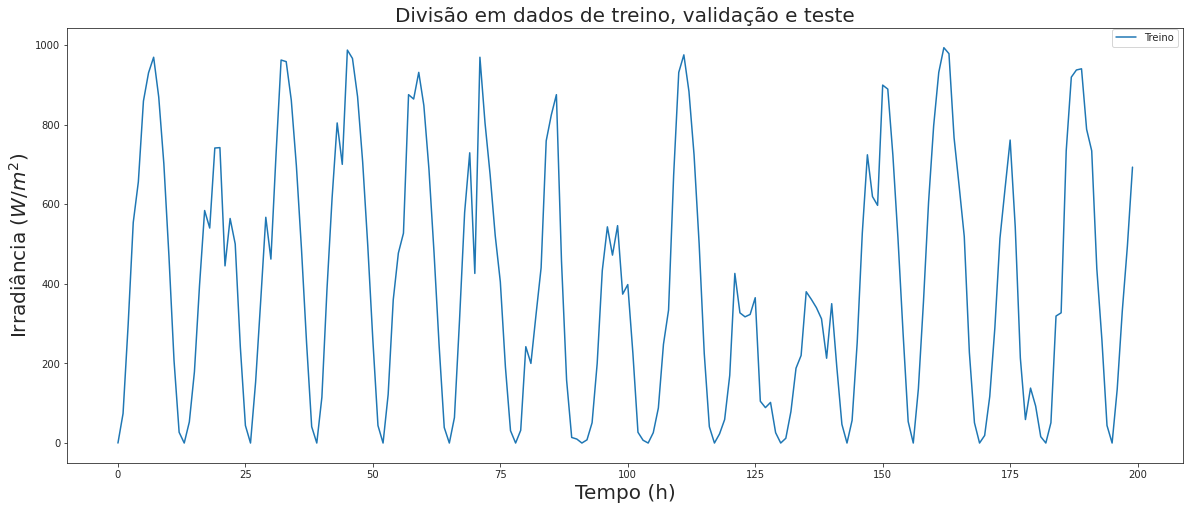

In [30]:
with sns.axes_style('ticks'):
    plt.figure(figsize=(20,8))
    plt.plot(train['ghi'][0:200], label='Treino')
    #plt.plot(valid['ghi'], label='Validação')
    #plt.plot(test['ghi'], label='Teste')
    plt.xlabel('Tempo (h)', fontsize=20)
    plt.ylabel('Irradiância ($W/m^2$)', fontsize=20)
    plt.title('Divisão em dados de treino, validação e teste', fontsize=20)
    plt.legend(bbox_to_anchor=(1,1.01))

### todo
+ Buscar mais informações sobre divisão dos dados: **treino/validação/teste**
+ fazer plot com o seaborn
+ Melhor forma de definir o tamanho de treino e teste é pensar no produto final. Qual é o horizonte de previsões adequado para melhor solucionar o problema?
+ Equilibrio entre a robustez da estimativa de validação e a capacidade do modelo de aprender com uma quantidade mínima necessária de exemplos
+ Fazer uma análise da pontação do modelo para diferentes tamanhos de conjuntos de treino e teste  

In [17]:
# Exportação dos dados para o formato CSV

#train.to_csv('../../Dados/local_BR/train_local_BR.csv', index=False)
#valid.to_csv('../../Dados/local_BR/valid_local_BR.csv', index=False)
#test.to_csv('../../Dados/local_BR/test_local_BR.csv', index=False)